In [1]:
!cd

C:\Users\admin\Desktop\데이터 공부 자료\day20\2021-K-Digital-Training-main\SQL


In [2]:
#!pip install PyMySQL==1.0.0

In [3]:
import pymysql.cursors
# Connect to the database

In [4]:
connection = pymysql.connect(host='localhost',
        user='me',
        password='9421',
        db='tip',
        charset='utf8',
        cursorclass=pymysql.cursors.DictCursor)

In [5]:
try:
    with connection.cursor() as cursor:
        # Read a single record
        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"
        sql = "select * from tips where tips.day='';"
        cursor.execute(sql)
        result = cursor.fetchone()
        print(result)
finally:
    connection.close()

None


In [6]:
import pandas as pd

In [7]:
# MySQL DB에서 데이터 받아와서 DataFrame에 저장

conn = pymysql.connect(host='localhost', user='me', 
                       password='9421', db='tip', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      sql = "select * from tips;"
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)
    
      df.to_csv('query.csv')

finally:

   conn.close()

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner   2.0
1         10.34  1.66    Male     No   Sun  Dinner   3.0
2         21.01  3.50    Male     No   Sun  Dinner   3.0
3         23.68  3.31    Male     No   Sun  Dinner   2.0
4         24.59  3.61  Female     No   Sun  Dinner   4.0
..          ...   ...     ...    ...   ...     ...   ...
245        3.07  1.00  Female    Yes   Sat  Dinner   3.0
246        3.07  1.00  Female    Yes  None  Dinner   3.0
247        3.07  1.00  Female    Yes  None  Dinner   NaN
248        3.07  1.00    None    Yes   Sun  Dinner   NaN
249        3.07  1.00  Female    Yes   Sun  Dinner   NaN

[250 rows x 7 columns]


In [8]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
245,3.07,1.00,Female,Yes,Sat,Dinner,3.0
246,3.07,1.00,Female,Yes,None,Dinner,3.0
247,3.07,1.00,Female,Yes,None,Dinner,NaN
248,3.07,1.00,None,Yes,Sun,Dinner,NaN


In [9]:
df['sex'].replace({'Female':0,'Male':1},inplace=True)

In [10]:
df['smoker'].replace({'No':0,'Yes':1},inplace=True)

In [11]:
df["day"].replace({"Thur" : 0, "Fri" : 1, "Sat" : 2, "Sun" : 3},inplace=True)

In [12]:
df['time'].replace({'Lunch':0,'Dinner':1},inplace=True)

In [13]:
df.isnull().sum()         #data frame에서 nan 찾기

total_bill    0
tip           0
sex           1
smoker        0
day           2
time          0
size          3
dtype: int64

In [14]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,250.000000,250.000000,249.000000,250.000000,248.000000,250.000000,247.000000
mean,19.440440,2.950360,0.630522,0.392000,1.741935,0.728000,2.570850
std,9.103058,1.400742,0.483636,0.489176,1.154964,0.445883,0.946775
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.137500,2.000000,0.000000,0.000000,0.750000,0.000000,2.000000
50%,17.490000,2.750000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.047500,3.507500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
#df=pd.read_csv('tips.csv')

In [17]:
import numpy as np
from sklearn.impute import SimpleImputer

In [18]:
data=df.values           #data frame -> array로 바꾸기

In [19]:
y=df['total_bill']       #구하고자 하는 값

In [20]:
X=df.drop('total_bill',axis=1) #구하고자 하는 값 제외한 것은 모두 넣고 비교

In [21]:
X.describe()

,tip,sex,smoker,day,time,size
count,250.000000,249.000000,250.000000,248.000000,250.000000,247.000000
mean,2.950360,0.630522,0.392000,1.741935,0.728000,2.570850
std,1.400742,0.483636,0.489176,1.154964,0.445883,0.946775
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.750000,0.000000,2.000000
50%,2.750000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,3.507500,1.000000,1.000000,3.000000,1.000000,3.000000
max,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [22]:
y.describe()

count    250.000000
mean      19.440440
std        9.103058
min        3.070000
25%       13.137500
50%       17.490000
75%       24.047500
max       50.810000
Name: total_bill, dtype: float64

In [23]:
data=X.values

In [24]:
y=y.values

In [25]:
data

array([[1.01, 0.  , 0.  , 3.  , 1.  , 2.  ],
       [1.66, 1.  , 0.  , 3.  , 1.  , 3.  ],
       [3.5 , 1.  , 0.  , 3.  , 1.  , 3.  ],
       ...,
       [1.  , 0.  , 1.  ,  nan, 1.  ,  nan],
       [1.  ,  nan, 1.  , 3.  , 1.  ,  nan],
       [1.  , 0.  , 1.  , 3.  , 1.  ,  nan]])

In [26]:
data.shape

(250, 6)

In [27]:
data[:,-1]

array([ 2.,  3.,  3.,  2.,  4.,  4.,  2.,  4.,  2.,  2.,  2.,  4.,  2.,
        4.,  2.,  2.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,  4.,  2.,  4.,
        2.,  2.,  2.,  2.,  2.,  4.,  2.,  4.,  2.,  3.,  3.,  3.,  3.,
        3.,  3.,  2.,  2.,  2.,  4.,  2.,  2.,  4.,  3.,  2.,  2.,  2.,
        4.,  2.,  4.,  2.,  4.,  2.,  2.,  4.,  2.,  2.,  2.,  4.,  3.,
        3.,  2.,  1.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,  2.,  4.,
        2.,  2.,  2.,  2.,  1.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  3.,  2.,  3.,  2.,  4.,
        2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  6.,  2.,  2.,  2.,  3.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  6.,  5.,
        6.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,  2.,  3.,  4.,  4.,  5.,
        6.,  4.,  2.,  4.,  4.,  2.,  3.,  2.,  2.,  3.,  2.,  4.,  2.,
        2.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4

In [28]:
sum(np.isnan(data).flatten())          #array에서 nan값 찾기

6

In [29]:
imputer = SimpleImputer(strategy='median')

In [30]:
imputer.fit(data)

SimpleImputer(strategy='median')

In [31]:
datatrans = imputer.transform(data)

In [32]:
datatrans[:,-1]

array([2., 3., 3., 2., 4., 4., 2., 4., 2., 2., 2., 4., 2., 4., 2., 2., 3.,
       3., 3., 3., 2., 2., 2., 4., 2., 4., 2., 2., 2., 2., 2., 4., 2., 4.,
       2., 3., 3., 3., 3., 3., 3., 2., 2., 2., 4., 2., 2., 4., 3., 2., 2.,
       2., 4., 2., 4., 2., 4., 2., 2., 4., 2., 2., 2., 4., 3., 3., 2., 1.,
       2., 2., 2., 3., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 1., 2., 2.,
       4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 1., 3., 2., 3., 2., 4., 2., 2.,
       4., 2., 2., 2., 2., 2., 6., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 6., 5., 6., 2., 2., 3., 2., 2., 2., 2., 2., 3.,
       4., 4., 5., 6., 4., 2., 4., 4., 2., 3., 2., 2., 3., 2., 4., 2., 2.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 3., 4., 2., 5., 3.,
       5., 3., 3., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 3., 2., 2., 2.,
       4., 3., 3., 4., 2., 2., 3., 4., 4., 2., 3., 2., 5., 2., 2., 4., 2.,
       2., 1., 3., 2., 2.

In [33]:
df_trans=pd.DataFrame(datatrans)

In [34]:
df_trans.isnull()

,0,1,2,3,4,5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
245,False,False,False,False,False,False
246,False,False,False,False,False,False
247,False,False,False,False,False,False
248,False,False,False,False,False,False


In [35]:
df_trans.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

# RFE

In [36]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [37]:
from sklearn.svm import SVR

In [38]:
estimator=SVR(kernel="linear")

In [39]:
# define RFE
rfe = RFE(estimator, n_features_to_select=4) #변수 6개 중 4개 가지기

In [40]:
y.shape

(250,)

In [41]:
# fit RFE
selecto=rfe.fit(datatrans, y)

In [42]:
selecto.support_

array([ True, False, False,  True,  True,  True])

In [43]:
X.head(3)   #2,3이 False 즉, sex와 smoker가 빠졌다.

,tip,sex,smoker,day,time,size
0,1.01,0.0,0,3.0,1,2.0
1,1.66,1.0,0,3.0,1,3.0
2,3.50,1.0,0,3.0,1,3.0


In [44]:
# summarize all features
for i in range(X.shape[1]):
  print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 3
Column: 2, Selected=False, Rank: 2
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1


In [45]:
df1=pd.DataFrame(datatrans)

# MinMaxScaler

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
trans = MinMaxScaler()

In [48]:
data.shape

(250, 6)

In [49]:
X_norm = trans.fit_transform(data)

In [50]:
df_norm=pd.DataFrame(X_norm)

In [51]:
df_norm.describe().round()

,0,1,2,3,4,5
count,250.0,249.0,250.0,248.0,250.0,247.0
mean,0.0,1.0,0.0,1.0,1.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,0.0,1.0,1.0,0.0
75%,0.0,1.0,1.0,1.0,1.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


# Data Standardization

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()

In [54]:
df_sc=sc.fit_transform(data)

In [55]:
df_trsfrom_sc=pd.DataFrame(df_sc)

In [56]:
df_trsfrom_sc.describe().round() #정규화가 끝나서 평균0, 분산1

,0,1,2,3,4,5
count,250.0,249.0,250.0,248.0,250.0,247.0
mean,0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0
50%,-0.0,1.0,-1.0,0.0,1.0,-1.0
75%,0.0,1.0,1.0,1.0,1.0,0.0
max,5.0,1.0,1.0,1.0,1.0,4.0


# PCA

In [57]:
from sklearn.decomposition import PCA

In [58]:
# define the transform
trans = PCA(n_components=4)

In [59]:
# transform the data
X_dim = trans.fit_transform(datatrans)

In [60]:
# summarize data after the transform
print(X_dim[:3, :]) #X_dim은 array라서 describe(),info() 불가

[[-1.58031804 -1.75734995  0.24316154 -0.28655772]
 [-0.54522699 -1.60572469  0.85558105 -0.34703258]
 [ 1.04210637 -1.0630594   0.10581942 -0.40621033]]


In [61]:
x_dim=pd.DataFrame(X_dim)

In [62]:
x_dim.describe().round()

,0,1,2,3
count,250.0,250.0,250.0,250.0
mean,0.0,0.0,-0.0,-0.0
std,2.0,1.0,1.0,0.0
min,-2.0,-2.0,-3.0,-1.0
25%,-1.0,-1.0,-0.0,-0.0
50%,-0.0,-0.0,-0.0,-0.0
75%,1.0,1.0,0.0,1.0
max,6.0,3.0,3.0,1.0


# Regression Feature Selection

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [64]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=4)

In [65]:
datatrans.shape

(250, 6)

In [66]:
y.shape

(250,)

In [67]:
# apply feature selection / 행이 같으므로 값이 나온다.
X_selected = fs.fit_transform(datatrans, y)
print(X_selected.shape)

(250, 4)


#### rfe는 독립변수들과 목표변수와의 관계를 통해 차원을 축소시키고
#### pca는 독립변수들끼리의 상관관계만으로만 차원을 축소시킨다.

In [68]:
#예전에 공부했던 내용들

In [69]:
df.total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
245     3.07
246     3.07
247     3.07
248     3.07
249     3.07
Name: total_bill, Length: 250, dtype: float64

In [70]:
df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
245     3.07
246     3.07
247     3.07
248     3.07
249     3.07
Name: total_bill, Length: 250, dtype: float64

<AxesSubplot:>

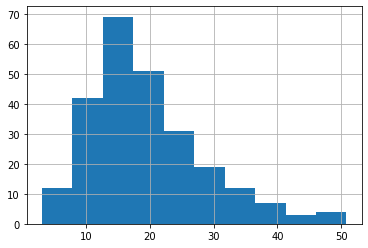

In [71]:
df['total_bill'].hist()

In [72]:
#새출발

In [73]:
import pymysql.cursors
import pandas as pd

In [74]:
sql="select customers.customerName, payments.checkNumber from customers left join payments on customers.customerNumber=payments.customerNumber where payments.paymentDate >= '2004-10-06';"

In [75]:
conn = pymysql.connect(host='localhost', user='me', 
                       password='9421', db='classicmodels', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)
    
    #df.to_csv('query.csv')

finally:

   conn.close()

                    customerName checkNumber
0              Atelier graphique    HQ336336
1              Atelier graphique    OM314933
2             Signal Gift Stores    BO864823
3     Australian Collectors, Co.    MA765515
4              La Rochelle Gifts    DB933704
..                           ...         ...
84              FunGiftIdeas.com    PE176846
85    Iberia Gift Imports, Corp.    GK294076
86  Motor Mint Distributors Inc.     HS86661
87             Kelly's Gift Shop    EU531600
88             Kelly's Gift Shop     MN89921

[89 rows x 2 columns]


In [76]:
df.to_csv('query_car.csv')